In [8]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle


In [9]:

train_labels = idx2numpy.convert_from_file('./mnist_data/train-labels.idx1-ubyte')
train_images = idx2numpy.convert_from_file('./mnist_data/train-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('./mnist_data/t10k-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('./mnist_data/t10k-images.idx3-ubyte')

print("Number of train labels:", train_labels.shape)# Number of labels: (60000,)
print("First 10 train labels:", train_labels[:10])# First 10 labels: [5 0 4 1 9 2 1 3 1 4]
print("Number of train images:", train_images.shape)# Number of images: (60000, 28, 28)
print("Number of test labels:", test_labels.shape)# Number of test labels: (10000,)

Number of train labels: (60000,)
First 10 train labels: [5 0 4 1 9 2 1 3 1 4]
Number of train images: (60000, 28, 28)
Number of test labels: (10000,)


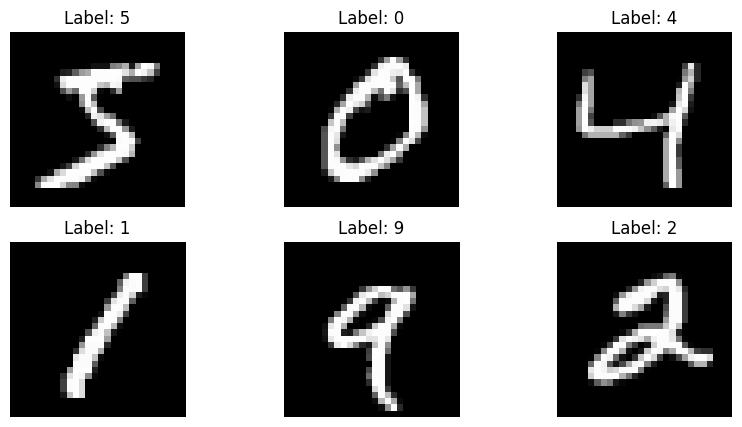

In [10]:

num_images_to_display = 6
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
for i in range(num_images_to_display):
    ax = axes[i // 3, i % 3]
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title(f'Label: {train_labels[i]}')
    ax.axis('off') 

plt.show()

In [11]:


class network(object):
    def __init__(self,sizes) -> None:
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y,1) for y in sizes[1:]]
        self.weights = [np.random.randn(y,x) for y,x in zip(sizes[1:],sizes[:-1])]
    
    def feedforward(self,a):
        '''
            一层一层的计算出神经网络的结果
        '''
        for b , w in zip(self.biases,self.weights):
            a = sigmoid(np.dot(w,a)+b)
        return a
    
    def SGD(self,training_data,epoches,mini_batch_size,eta,test_data=None):
        '''
            随机梯度下降函数
            >超参数
                epoches:整个训练数据集被遍历一次的过程
                mini_batch_size:批大小
                eta:learning_rate
        '''
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epoches):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print ("Epoch {0}: {1} %".format(j+1, 100*self.evaluate(test_data)/n_test))
            else:
                print ("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        '''
            更新批次数据内的bias和wieght
        '''
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]

    def evaluate(self, test_data):
        '''
            对比正确率
        '''
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        activation = x
        activations = [x] # 一个列表，用于存储每一层的激活值
        zs = [] # 一个列表，用于存储每一层的输入值

        # 前向传播
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z) # 存储每一层的输入值
            activation = sigmoid(z)
            activations.append(activation) # 存储每一层的激活值

        # 反向传播
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1]) # 计算最后一层的delta
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
    
    def cost_derivative(self, output_activations, y):
        return (output_activations-y)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [12]:
# 数据预处理
def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

training_inputs = [np.reshape(x, (784, 1)) for x in train_images]
training_results = [vectorized_result(y) for y in train_labels]
train_data = list(zip(training_inputs, training_results))

test_inputs = [np.reshape(x, (784, 1)) for x in test_images]
test_data = list(zip(test_inputs, test_labels))

In [ ]:

net = network([784,30,10])
net.SGD(train_data, 100, 10, 0.08, test_data=test_data)
# 保存 net 对象到文件
with open('network_model.pkl', 'wb') as f:
    pickle.dump(net, f)
    print('Model saved to file.') 


/var/folders/pl/ldmtqhjj0z96x86x2qwd0qpw0000gn/T/ipykernel_10289/1562310629.py:87: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Epoch 1: 44.86 %
Epoch 2: 58.41 %
Epoch 3: 62.88 %
Epoch 4: 66.15 %
Epoch 5: 70.45 %
Epoch 6: 73.42 %
Epoch 7: 75.02 %
Epoch 8: 77.7 %
Epoch 9: 79.31 %
Epoch 10: 80.1 %
Epoch 11: 81.11 %
Epoch 12: 81.3 %
Epoch 13: 80.72 %
Epoch 14: 81.76 %
Epoch 15: 82.53 %
Epoch 16: 81.31 %
Epoch 17: 83.61 %
Epoch 18: 84.08 %
Epoch 19: 85.35 %
Epoch 20: 85.32 %
Epoch 21: 84.74 %
Epoch 22: 85.41 %
Epoch 23: 85.07 %
Epoch 24: 85.6 %
Epoch 25: 85.13 %
Epoch 26: 85.08 %
Epoch 27: 85.13 %
Epoch 28: 86.81 %
Epoch 29: 86.35 %
Epoch 30: 86.42 %
Epoch 31: 86.51 %
Epoch 32: 85.25 %
Epoch 33: 87.69 %
Epoch 34: 83.83 %
Epoch 35: 87.18 %
Epoch 36: 85.64 %
Epoch 37: 86.94 %
Epoch 38: 87.36 %
Epoch 39: 87.44 %
Epoch 40: 87.36 %
Epoch 41: 86.69 %
Epoch 42: 86.92 %
Epoch 43: 87.81 %
Epoch 44: 87.9 %
Epoch 45: 86.65 %
Epoch 46: 86.98 %
Epoch 47: 87.19 %
Epoch 48: 87.69 %
Epoch 49: 85.88 %
Epoch 50: 87.34 %
Epoch 51: 88.03 %
Epoch 52: 88.24 %
Epoch 53: 85.82 %
Epoch 54: 88.24 %
Epoch 55: 87.45 %
Epoch 56: 88.52 %
Epoch 